MNIST Dataset Convolution

In [1]:
%load_ext tensorboard

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Dropout, BatchNormalization
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint
import datetime

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_validation, y_validation) = mnist.load_data()

x_train = x_train.reshape(60000, 28, 28, 1)
x_validation = x_validation.reshape(10000, 28, 28, 1)
x_train, x_validation = x_train/255, x_validation/255

kernel_size = (3,3)
pool_size = (2,2)

x_train = x_train.astype('float32')
x_validation = x_validation.astype('float32')

print(x_train.shape, 'train samples')
print(x_validation.shape, 'validation samples')

print(y_train.shape, 'y_train')
print(y_validation.shape, 'y_validation')

(60000, 28, 28, 1) train samples
(10000, 28, 28, 1) validation samples
(60000,) y_train
(10000,) y_validation


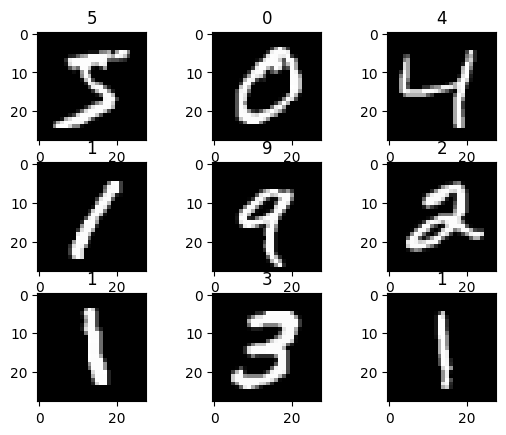

In [3]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(y_train[i])
plt.show()


In [4]:
import keras
from keras.layers import Conv2D, MaxPool2D, Flatten, GlobalAveragePooling2D
from keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential

model = Sequential()

model.add(Conv2D(32, kernel_size, activation = 'relu', input_shape=(28, 28, 1)))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size))
model.add(Dropout(0.5))

model.add(Conv2D(64, kernel_size, activation = 'relu'))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size))
model.add(Dropout(0.5))

# MLP
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(10, activation='softmax'))

model.summary()

c:\Users\Gaspard\anaconda3\envs\environment_conda_test\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,930 (882.54 KB)

 Trainable params: 225,482 (880.79 KB)

 Non-trainable params: 448 (1.75 KB)

In [5]:
checkpointer = ModelCheckpoint(filepath='model.keras', monitor='val_loss', verbose=1, save_best_only=True)

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

y_train = to_categorical(y_train, num_classes=10)
y_validation = to_categorical(y_validation, num_classes=10)

history = model.fit(x_train, y_train, validation_data = (x_validation, y_validation), epochs=5, batch_size=16, callbacks=[checkpointer, tensorboard])

Epoch 1/5
3745/3750 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8647 - loss: 0.4266
Epoch 1: val_loss improved from inf to 0.05154, saving model to model.keras
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 40s 10ms/step - accuracy: 0.8648 - loss: 0.4262 - val_accuracy: 0.9834 - val_loss: 0.0515
Epoch 2/5
3748/3750 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9630 - loss: 0.1206
Epoch 2: val_loss improved from 0.05154 to 0.03500, saving model to model.keras
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 41s 11ms/step - accuracy: 0.9630 - loss: 0.1206 - val_accuracy: 0.9884 - val_loss: 0.0350
Epoch 3/5
3745/3750 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9721 - loss: 0.0886
Epoch 3: val_loss improved from 0.03500 to 0.03199, saving model to model.keras
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 38s 10ms/step - accuracy: 0.9721 - loss: 0.0886 - val_accuracy: 0.9897 - val_loss: 0.0320
Epoch 4/5
3749/3750 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9745 - loss: 0.0792
Epoch 4: val_loss did not improve from 0.03199
375

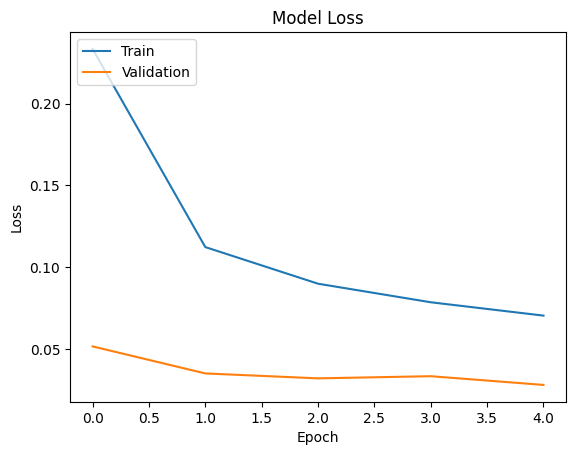

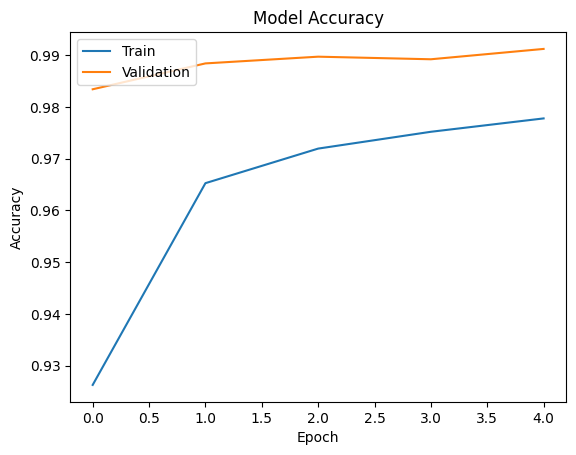

In [6]:
# plot the loss and accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## CIFAR10

In [7]:
from keras.datasets import cifar10

cifar10 = tf.keras.datasets.cifar10


(x_train, y_train), (x_validation, y_validation) = cifar10.load_data()

# reshape
x_train = x_train.reshape(50000, 32, 32, 3)
x_validation = x_validation.reshape(10000, 32, 32, 3)
x_train, x_validation = x_train/255, x_validation/255

kernel_size = (3,3)
pool_size = (2,2)

x_train = x_train.astype('float32')
x_validation = x_validation.astype('float32')

print(x_train.shape, 'train samples')
print(x_validation.shape, 'validation samples')

print(y_train.shape, 'y_train')
print(y_validation.shape, 'y_validation')

(50000, 32, 32, 3) train samples
(10000, 32, 32, 3) validation samples
(50000, 1) y_train
(10000, 1) y_validation


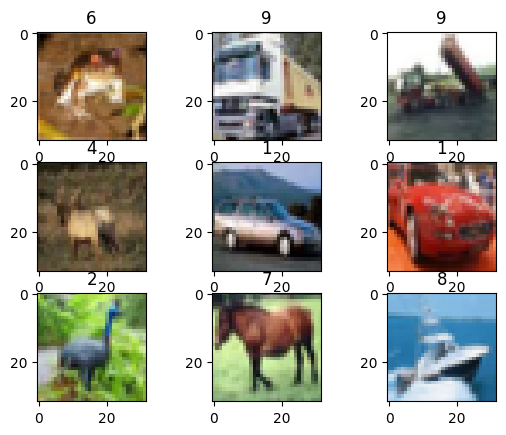

In [8]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i].reshape(32,32,3), interpolation='none')
    plt.title(y_train[i][0])
plt.show()

In [9]:
model = Sequential()

model.add(Conv2D(32, kernel_size, activation = 'relu', input_shape=(32, 32, 3)))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size))
model.add(Dropout(0.5))

model.add(Conv2D(64, kernel_size, activation = 'relu'))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size))
model.add(Dropout(0.5))

# MLP
model.add(Flatten())
model.add(Dense(64, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,946 (656.04 KB)

 Trainable params: 167,754 (655.29 KB)

 Non-trainable params: 192 (768.00 B)

In [10]:
from tensorflow.keras.optimizers import Adam

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

y_train = to_categorical(y_train, num_classes=10)
y_validation = to_categorical(y_validation, num_classes=10)

history = model.fit(x_train, y_train, validation_data = (x_validation, y_validation), epochs=10, batch_size=32, callbacks=[checkpointer, tensorboard])

Epoch 1/10
1560/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3192 - loss: 1.8873
Epoch 1: val_loss did not improve from 0.02797
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 18ms/step - accuracy: 0.3194 - loss: 1.8867 - val_accuracy: 0.4625 - val_loss: 1.6092
Epoch 2/10
1561/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5110 - loss: 1.3586
Epoch 2: val_loss did not improve from 0.02797
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.5111 - loss: 1.3585 - val_accuracy: 0.5355 - val_loss: 1.4044
Epoch 3/10
1560/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5727 - loss: 1.2084
Epoch 3: val_loss did not improve from 0.02797
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.5727 - loss: 1.2084 - val_accuracy: 0.5315 - val_loss: 1.4435
Epoch 4/10
1561/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5947 - loss: 1.1367
Epoch 4: val_loss did not improve from 0.02797
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.5947 - loss: 1.1367 - val_accuracy

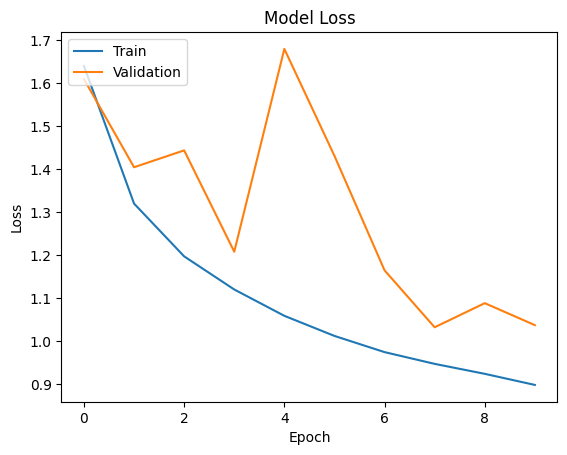

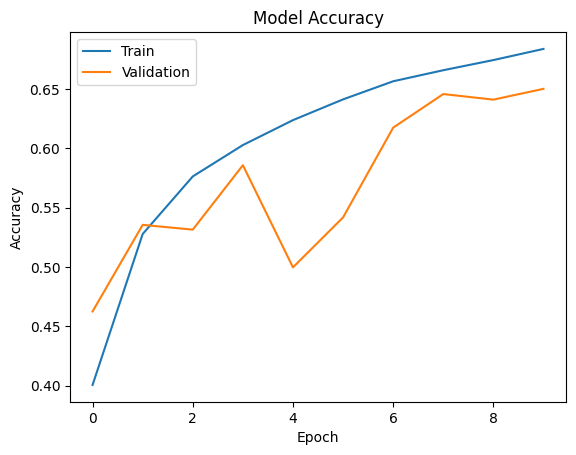

In [11]:
# plot the loss and accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### CIFAR100

In [12]:
from keras.datasets import cifar100

cifar10 = tf.keras.datasets.cifar100


(x_train, y_train), (x_validation, y_validation) = cifar100.load_data()

# reshape
x_train = x_train.reshape(50000, 32, 32, 3)
x_validation = x_validation.reshape(10000, 32, 32, 3)
x_train, x_validation = x_train/255, x_validation/255

kernel_size = (3,3)
pool_size = (2,2)

x_train = x_train.astype('float32')
x_validation = x_validation.astype('float32')

print(x_train.shape, 'train samples')
print(x_validation.shape, 'validation samples')

print(y_train.shape, 'y_train')
print(y_validation.shape, 'y_validation')

(50000, 32, 32, 3) train samples
(10000, 32, 32, 3) validation samples
(50000, 1) y_train
(10000, 1) y_validation


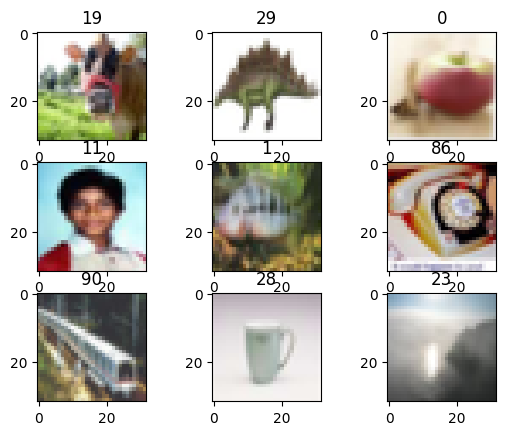

In [13]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i].reshape(32,32,3), interpolation='none')
    plt.title(y_train[i][0])
plt.show()

In [14]:
from tensorflow.keras.optimizers import RMSprop

model = Sequential()

model.add(Conv2D(32, kernel_size, activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPool2D(pool_size))

model.add(Conv2D(64, kernel_size, activation='relu'))
model.add(MaxPool2D(pool_size))

model.add(Conv2D(128, kernel_size, activation='relu'))
model.add(MaxPool2D(pool_size))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(100, activation='softmax'))

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        12,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 171,812 (671.14 KB)

 Trainable params: 171,812 (671.14 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

optimizer = RMSprop(learning_rate=0.001) # Essai d'un autre optimizer par manque de temps avec Adam, compilation trop longue
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

y_train = to_categorical(y_train, num_classes=100)
y_validation = to_categorical(y_validation, num_classes=100)

history = model.fit(x_train, y_train, validation_data=(x_validation, y_validation), epochs=20, batch_size=256, callbacks=[checkpointer, tensorboard])


Epoch 1/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.0252 - loss: 4.4757
Epoch 1: val_loss did not improve from 0.02797
196/196 ━━━━━━━━━━━━━━━━━━━━ 26s 115ms/step - accuracy: 0.0253 - loss: 4.4750 - val_accuracy: 0.0960 - val_loss: 4.0158
Epoch 2/20
195/196 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.0861 - loss: 4.0152
Epoch 2: val_loss did not improve from 0.02797
196/196 ━━━━━━━━━━━━━━━━━━━━ 22s 111ms/step - accuracy: 0.0863 - loss: 4.0143 - val_accuracy: 0.1268 - val_loss: 3.7946
Epoch 3/20
195/196 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.1326 - loss: 3.7256
Epoch 3: val_loss did not improve from 0.02797
196/196 ━━━━━━━━━━━━━━━━━━━━ 23s 117ms/step - accuracy: 0.1326 - loss: 3.7250 - val_accuracy: 0.1795 - val_loss: 3.4842
Epoch 4/20
195/196 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.1656 - loss: 3.5166
Epoch 4: val_loss did not improve from 0.02797
196/196 ━━━━━━━━━━━━━━━━━━━━ 23s 115ms/step - accuracy: 0.1657 - loss: 3.5162 - val_accuracy: 0.1963

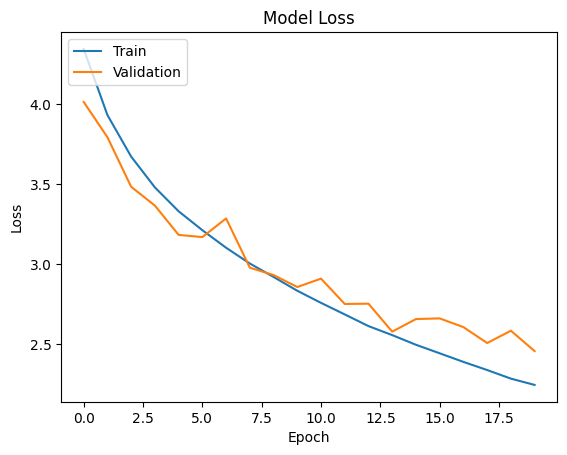

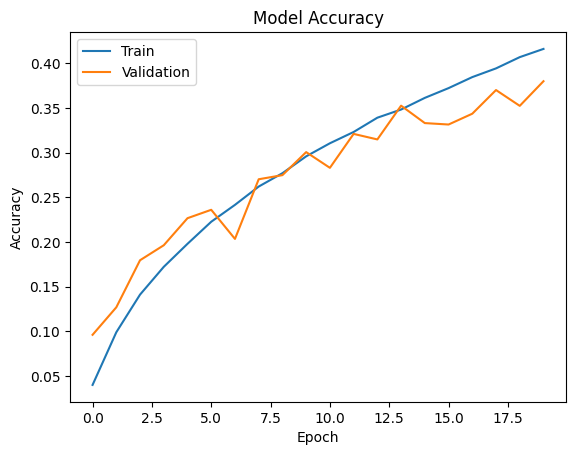

In [16]:
# plot the loss and accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [17]:
%tensorboard --logdir logs/fit